# Exploratory  Data Analysis : 2019

# Introduction
In this notebook we are going to check if amount of loan approved has anything to do with the race of the person. To achive this we are going to check the correlation of the columns with race of borrower and try find any patterns that relate to race. 

## Import relevant Packages

In [1]:
#Import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Importing the data from Data from DW step

In [2]:
#Read Data
df_2019=pd.read_csv('Data/2019_dw_data.csv')

In [3]:
#Exploring the data
df_2019.head().transpose()

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
Year,2019,2019,2019,2019,2019
LoanCharacteristicsID,2407198,2407199,2407200,2407201,2407202
Bank,Boston,Boston,Boston,Boston,Boston
FIPSStateNumericCode,50,50,50,50,23
FIPSCountyCode,7,7,15,17,31
CoreBasedStatisticalAreaCode,15540,15540,99999,30100,38860
CensusTractIdentifier,34,29,9532,9594,254
CensusTractMinorityRatioPercent,4.577,3.421,6.152,3.935,6.031
CensusTractMedFamIncomeAmount,132474,100795,49625,62643,87679


In [4]:
#Drop Unnamed:0 column
df_2019=df_2019.iloc[:,1:]

In [5]:
#Check the shape of the DataFrame
df_2019.shape

(89767, 54)

In [6]:
#Check tha data again
df_2019.head().transpose()

,0,1,2,3,4
Year,2019,2019,2019,2019,2019
LoanCharacteristicsID,2407198,2407199,2407200,2407201,2407202
Bank,Boston,Boston,Boston,Boston,Boston
FIPSStateNumericCode,50,50,50,50,23
FIPSCountyCode,7,7,15,17,31
CoreBasedStatisticalAreaCode,15540,15540,99999,30100,38860
CensusTractIdentifier,34,29,9532,9594,254
CensusTractMinorityRatioPercent,4.577,3.421,6.152,3.935,6.031
CensusTractMedFamIncomeAmount,132474,100795,49625,62643,87679
LocalAreaMedianIncomeAmount,84290,84290,67566,67105,76445


## Check Borrower Count
- Check the number of borrowers to see how many borrowers are assigned to each loan. 

In [8]:
#Check the Borrower Counts using value counts.
df_2019['BorrowerCount'].value_counts()

2    51372
1    37910
3      401
4       83
5        1
Name: BorrowerCount, dtype: int64

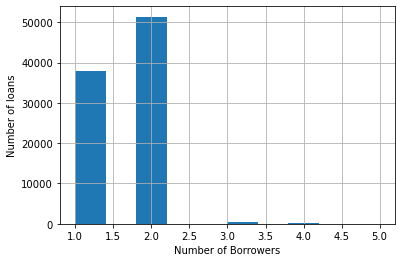

In [10]:
df_2019['BorrowerCount'].hist()
plt.xlabel('Number of Borrowers')
plt.ylabel('Number of loans')
plt.show()

Hence most of the loans have one and two borrowers. Therefore we will focus on the race of borrower1 and borrower2 only since most probably race of only first 2 borrower will contribute to the biases if there is any.

## Check race count of Borrower 1 and Borrower 2:  Borrower1Race1Type ,Borrower2Race1Type
We will check the frequency of the races of these two borrowers.

In [11]:
#Check the Borrower Counts using value counts. 
#Numeric code indicating the race of the Borrower. 1=American Indian or Alaska Native, 2=Asian, 
#3=Black or African American, 4=Native Hawaiian or other Pacific Islander, 
#5=White, 6=Information not provided by Borrower, 
#7=Not Applicable (First or primary borrower is an institution, corporation or partnership)
df_2019['Borrower1Race1Type'].value_counts()

5    76982
6     7352
2     3128
3     1677
1      516
4      112
Name: Borrower1Race1Type, dtype: int64

In [19]:
#Repplace values with names
df_2019=df_2019.replace({'Borrower1Race1Type': {1:'American Indian', 2:'Asian', 3:'Black', 4:'Native Hawaiian', 5:'White', 6:'No Information', 7:'Not Applicable'}})

In [20]:
df_2019['Borrower1Race1Type'].head()

0    White
1    White
2    White
3    White
4    White
Name: Borrower1Race1Type, dtype: object

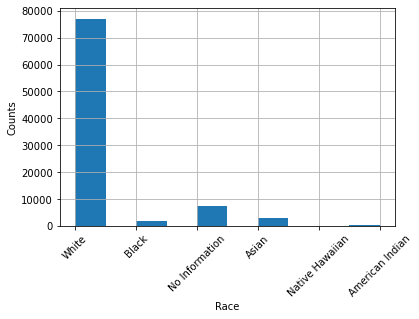

In [22]:
#Check Visually
df_2019['Borrower1Race1Type'].hist()
plt.xlabel('Race')
plt.ylabel('Counts')
plt.xticks(rotation = 45)
plt.show()

Hence most of the borrower1 are of white race and arond 7000 borrowers did not provide any information.

In [13]:
#Borrower 2
#Numeric code indicating the race of the Co-Borrower. 1=American Indian or Alaska Native, 2=Asian, 
#3=Black or African American, 4=Native Hawaiian or other Pacific Islander, 5=White, 
#6=Information not provided by borrower, 
#7=Not Applicable (First or primary borrower is an institution, corporation or partnership), 8=No Co-Borrower
df_2019['Borrower2Race1Type'].value_counts()

5    44821
8    37965
6     4502
2     1577
3      638
1      199
4       64
7        1
Name: Borrower2Race1Type, dtype: int64

In [24]:
#Replace code with names 
#Repplace values with names
df_2019=df_2019.replace({'Borrower2Race1Type': {1:'American Indian', 2:'Asian', 3:'Black', 4:'Native Hawaiian', 5:'White', 6:'No Information', 7:'Not Applicable',8:'No Co-Borrower'}})

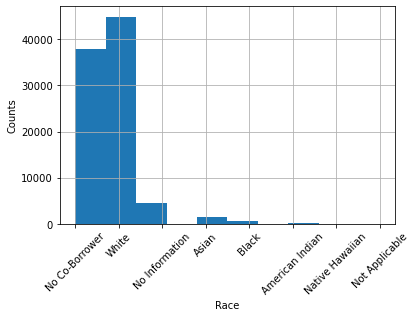

In [26]:
#Check Visually
df_2019['Borrower2Race1Type'].hist()
plt.xlabel('Race')
plt.ylabel('Counts')
plt.xticks(rotation = 45)
plt.show()

Hence most of the borrower2 are of white race and around 38000 loans don't have co-borrower.

## Check Banks according to there race distribuation.

In [15]:
#Bank Frequency
df_2019['Bank'].value_counts()

Chicago          22462
Topeka           16093
Des Moines       14468
Cincinnati       11250
Dallas            8069
Indianapolis      5677
Pittsburgh        4458
Boston            2824
San Francisco     2487
New York          1979
Name: Bank, dtype: int64

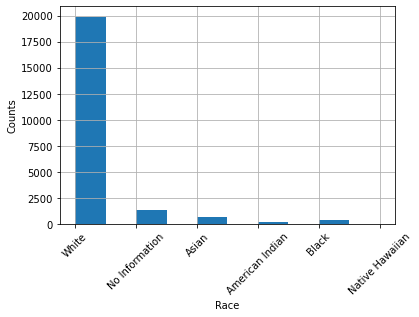

In [28]:
#Chicago
df_2019[df_2019['Bank']=='Chicago']['Borrower1Race1Type'].hist()
plt.xlabel('Race')
plt.ylabel('Counts')
plt.xticks(rotation = 45)
plt.show()

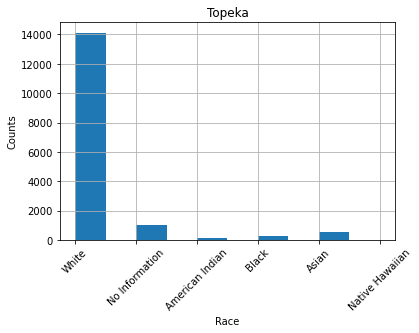

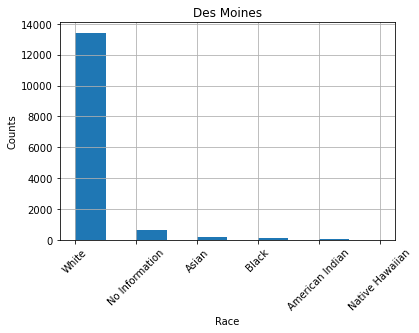

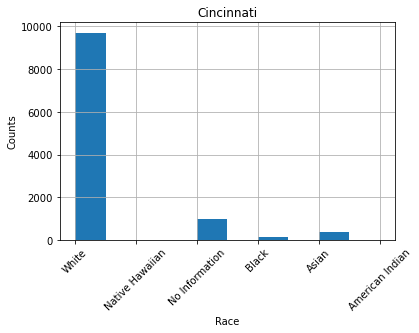

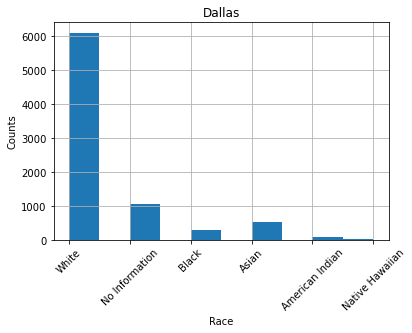

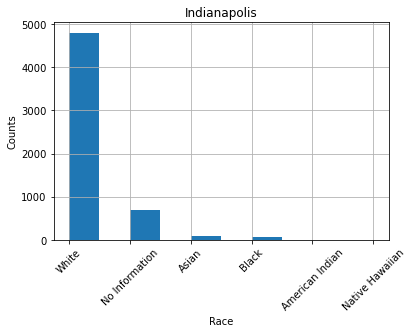

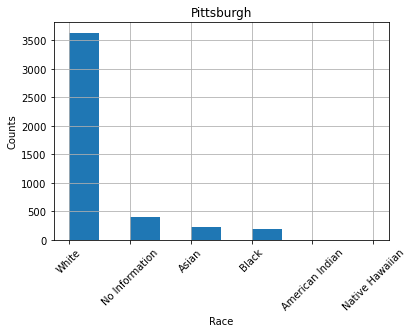

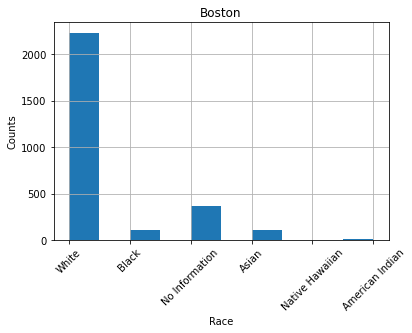

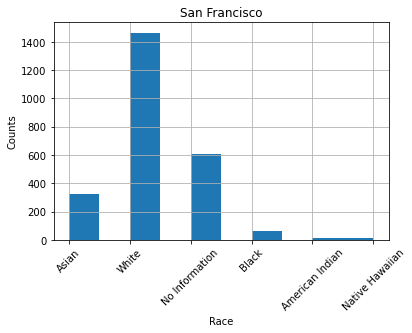

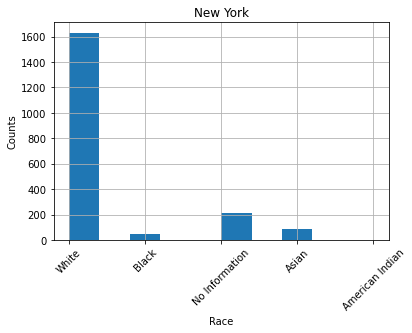

In [30]:
#View distribuation of races in the remaing cities.
for bank in ['Topeka','Des Moines','Cincinnati','Dallas','Indianapolis','Pittsburgh','Boston','San Francisco','New York']:
    df_2019[df_2019['Bank']==bank]['Borrower1Race1Type'].hist()
    plt.xlabel('Race')
    plt.ylabel('Counts')
    plt.xticks(rotation = 45)
    plt.title(bank)
    plt.show()

Hence all the cities have majority of white borrowers to whom loan was approved.Lets check the distribuation of co-borrowers. 

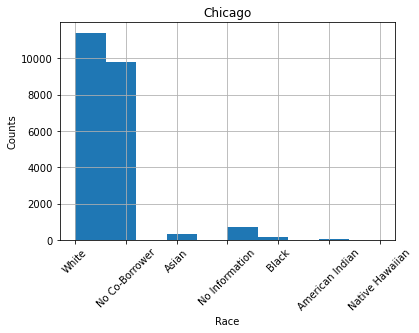

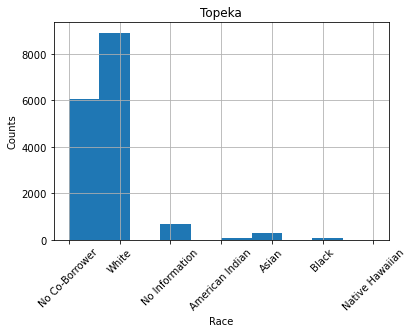

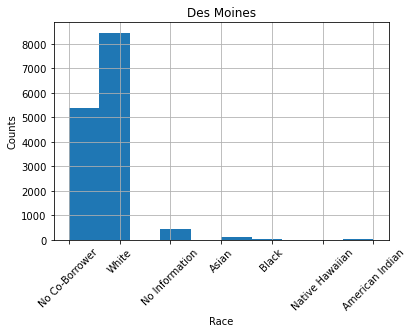

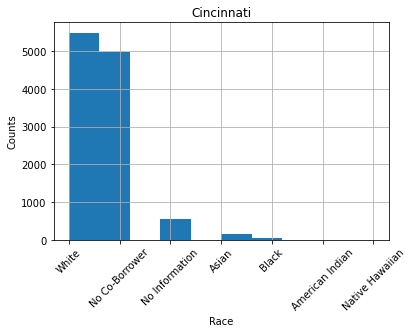

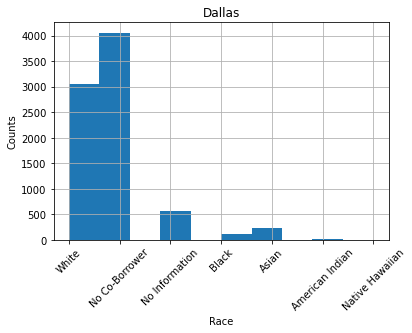

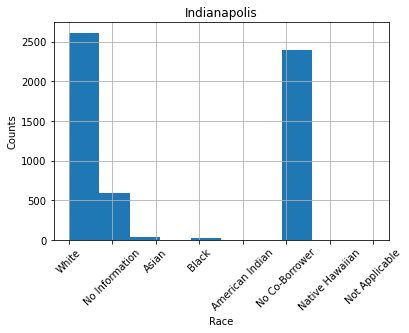

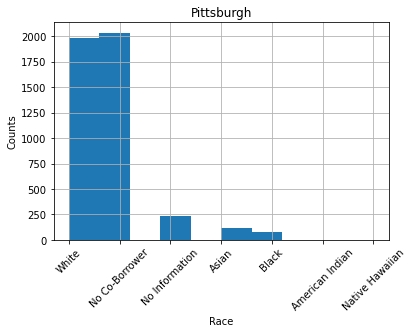

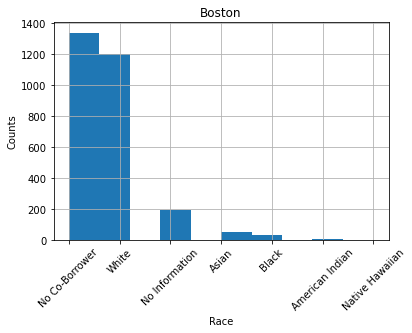

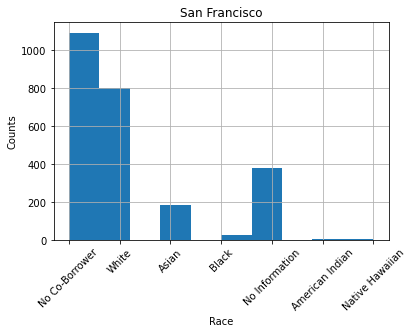

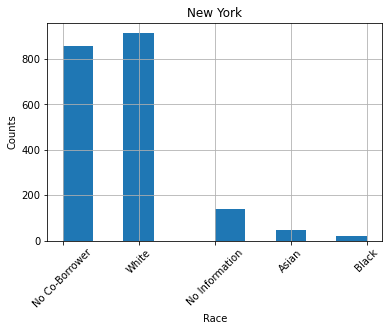

In [31]:
#View distribuation of races in the remaing cities.
for bank in ['Chicago','Topeka','Des Moines','Cincinnati','Dallas','Indianapolis','Pittsburgh','Boston','San Francisco','New York']:
    df_2019[df_2019['Bank']==bank]['Borrower2Race1Type'].hist()
    plt.xlabel('Race')
    plt.ylabel('Counts')
    plt.xticks(rotation = 45)
    plt.title(bank)
    plt.show()

We see similar pattern in the distribuation of co-borrowers. Majority of co-borrowers are white in all the above cities.

In [8]:
#'LoanAcquisitionActualUPBAmt' and 'NoteAmount' seems to be duplicate lets check it. 
np.sum(df_2019['LoanAcquisitionActualUPBAmt']== df_2019['NoteAmount'])

77406

Hence there are some values where two columns have not the same value. Lets check the rows where both have not same values. 

In [10]:
df_2019[df_2019['LoanAcquisitionActualUPBAmt']!= df_2019['NoteAmount']].transpose()

,19,20,69,70,72,73,90,91,92,94,...,89034,89332,89543,89545,89553,89569,89572,89574,89575,89576
Year,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,...,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019
LoanCharacteristicsID,2407217,2407218,2407267,2407268,2407270,2407271,2407288,2407289,2407290,2407292,...,2491238,2491536,2491747,2491749,2491757,2491773,2491776,2491778,2491779,2491780
Bank,Boston,Boston,Boston,Boston,Boston,Boston,Boston,Boston,Boston,Boston,...,Topeka,Topeka,Topeka,Topeka,Topeka,Topeka,Topeka,Topeka,Topeka,Topeka
FIPSStateNumericCode,25,12,23,23,23,23,25,9,25,9,...,20,31,8,4,8,8,8,8,8,8
FIPSCountyCode,21,86,5,5,17,5,13,3,27,13,...,91,55,31,13,117,59,35,5,35,39
CoreBasedStatisticalAreaCode,14460,33100,38860,38860,99999,38860,44140,25540,49340,25540,...,28140,36540,19740,38060,14720,19740,19740,19740,19740,19740
CensusTractIdentifier,4224,195,171.02,25.02,9665,40.02,8016.04,4761,7371,8601,...,526.01,67.01,37.03,8156,4.01,120.27,141.27,68.54,140.07,9612.04
CensusTractMinorityRatioPercent,13.436,81.648,2.284,5.653,4.627,4.384,23.573,20.438,6.314,5.141,...,10.713,11.33,22.706,32.047,11.472,5.522,12.51,26.018,25.353,10.812
CensusTractMedFamIncomeAmount,105577,69580,81856,120577,42143,87240,79615,76520,107400,103352,...,132366,147969,122500,97267,90379,116842,163750,104028,77000,119531
LocalAreaMedianIncomeAmount,98431,58757,76445,76445,57050,76445,69235,90197,83776,90197,...,77634,79131,88102,68709,90271,88102,88102,88102,88102,88102


It looks like both columns have approx same values. Lets check if this fact by subtracting LoanAcquisitionActualUPBAmt column from NoteAmount and check if the difference is less than 500. 

In [16]:
df_2019[df_2019['NoteAmount']-df_2019['LoanAcquisitionActualUPBAmt']>500].transpose()

,20,69,70,90,91,92,94,95,98,100,...,88984,88990,89332,89543,89545,89553,89569,89572,89574,89576
Year,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,...,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019
LoanCharacteristicsID,2407218,2407267,2407268,2407288,2407289,2407290,2407292,2407293,2407296,2407298,...,2491188,2491194,2491536,2491747,2491749,2491757,2491773,2491776,2491778,2491780
Bank,Boston,Boston,Boston,Boston,Boston,Boston,Boston,Boston,Boston,Boston,...,Topeka,Topeka,Topeka,Topeka,Topeka,Topeka,Topeka,Topeka,Topeka,Topeka
FIPSStateNumericCode,12,23,23,25,9,25,9,9,9,25,...,20,20,31,8,4,8,8,8,8,8
FIPSCountyCode,86,5,5,13,3,27,13,13,13,27,...,173,155,55,31,13,117,59,35,5,39
CoreBasedStatisticalAreaCode,33100,38860,38860,44140,25540,49340,25540,25540,25540,49340,...,48620,26740,36540,19740,38060,14720,19740,19740,19740,19740
CensusTractIdentifier,195,171.02,25.02,8016.04,4761,7371,8601,8501,8501,7322.02,...,103,11,67.01,37.03,8156,4.01,120.27,141.27,68.54,9612.04
CensusTractMinorityRatioPercent,81.648,2.284,5.653,23.573,20.438,6.314,5.141,5.36,5.36,28.704,...,14.47,9.777,11.33,22.706,32.047,11.472,5.522,12.51,26.018,10.812
CensusTractMedFamIncomeAmount,69580,81856,120577,79615,76520,107400,103352,102232,102232,46674,...,104280,80313,147969,122500,97267,90379,116842,163750,104028,119531
LocalAreaMedianIncomeAmount,58757,76445,76445,69235,90197,83776,90197,90197,90197,83776,...,68171,60187,79131,88102,68709,90271,88102,88102,88102,88102


Hence there are significant number of values where both columns have not 'approximatly' same value. Therefore I will not drop one of the columns.  

In [8]:
#Check the dtypes of the data
df_2019.dtypes

Year                                 int64
LoanCharacteristicsID                int64
Bank                                object
FIPSStateNumericCode                 int64
FIPSCountyCode                       int64
CoreBasedStatisticalAreaCode         int64
CensusTractIdentifier              float64
CensusTractMinorityRatioPercent    float64
CensusTractMedFamIncomeAmount        int64
LocalAreaMedianIncomeAmount          int64
TotalMonthlyIncomeAmount             int64
HUDMedianIncomeAmount                int64
LoanAcquisitionActualUPBAmt          int64
LTVRatioPercent                    float64
NoteDate                             int64
LoanAcquistionDate                   int64
LoanPurposeType                      int64
ProductCategoryName                  int64
MortgageType                         int64
ScheduledTotalPaymentCount           int64
MortgageLoanSellerInstType           int64
BorrowerCount                        int64
BorrowerFirstTimeHomebuyer           int64
Borrower1Ra

In [11]:
#Describe the data
df_2019.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,89767.0,2.019000e+03,0.000000,2019.00,2.019000e+03,2019.000,2019.000,2019.000
LoanCharacteristicsID,89767.0,2.452548e+06,26949.017034,2406119.00,2.429908e+06,2452349.000,2474790.500,2521673.000
FIPSStateNumericCode,89767.0,2.987412e+01,15.367330,1.00,1.800000e+01,27.000,42.000,66.000
FIPSCountyCode,89767.0,8.964927e+01,85.719173,1.00,3.300000e+01,71.000,121.000,840.000
CoreBasedStatisticalAreaCode,89767.0,3.617272e+04,23931.023618,10100.00,1.943000e+04,31080.000,41180.000,99999.000
CensusTractIdentifier,89767.0,2.681255e+03,3652.664758,1.00,1.020200e+02,414.090,4922.015,9917.030
CensusTractMinorityRatioPercent,89767.0,1.784488e+01,18.600936,0.00,5.390500e+00,11.000,22.546,99.822
CensusTractMedFamIncomeAmount,89767.0,8.779961e+04,30551.702748,0.00,6.627000e+04,82019.000,104219.000,250001.000
LocalAreaMedianIncomeAmount,89767.0,7.407845e+04,11949.849407,0.00,6.582900e+04,73493.000,79347.000,133523.000
TotalMonthlyIncomeAmount,89767.0,9.837590e+03,7843.469558,791.00,5.615000e+03,8333.000,11907.000,449001.000


# Lets work with each columns and visualize any pattern in the data.

## Bank : Name of Federal Home Loan Bank District

Lets check the Bank columns. 

In [18]:
df_2019['Bank'].value_counts()

Chicago          22462
Topeka           16093
Des Moines       14468
Cincinnati       11250
Dallas            8069
Indianapolis      5677
Pittsburgh        4458
Boston            2824
San Francisco     2487
New York          1979
Name: Bank, dtype: int64

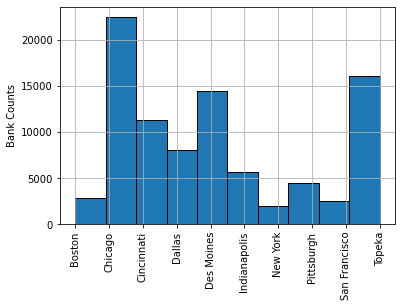

In [32]:
df_2019['Bank'].hist(ec='Black')
plt.xticks(rotation='vertical')
plt.ylabel('Bank Counts')
plt.show()

Chicago is having large number of banks,then Topeka.

## FIPSStateNumericCode : 2 Digit FIPS State Code 
## and 
## FIPSCountyCode: 3 Digit FIPS County Code

In [41]:
df_2019['FIPSStateNumericCode'].value_counts()

55    10747
17     6843
39     6748
19     5782
20     5004
6      4910
18     4409
48     4409
31     4403
29     3628
27     3471
8      2734
42     2300
26     2197
25     2077
21     1502
46     1451
36     1377
51     1243
40     1197
12     1085
47      930
34      859
37      839
4       839
16      810
22      754
13      735
5       730
24      623
53      593
41      587
49      577
1       381
9       305
32      297
23      275
35      264
45      237
54      208
44      187
28      177
38      162
30      157
11      151
50      148
33      138
56      125
10       85
15       54
2        17
66        6
Name: FIPSStateNumericCode, dtype: int64

In [46]:
#Lets collect the state code from internet
states=pd.read_csv('https://www2.census.gov/geo/docs/reference/state.txt',sep='|')
states.head()

,STATE,STUSAB,STATE_NAME,STATENS
0,1,AL,Alabama,1779775
1,2,AK,Alaska,1785533
2,4,AZ,Arizona,1779777
3,5,AR,Arkansas,68085
4,6,CA,California,1779778


In [67]:
#Rename FIPSStateNumericCode column to merge with states dataframe
df_2019=df_2019.rename(columns={"FIPSStateNumericCode": "STATE"})

In [68]:
#Check the column names. 
df_2019.head()

,Year,LoanCharacteristicsID,Bank,STATE,FIPSCountyCode,CoreBasedStatisticalAreaCode,CensusTractIdentifier,CensusTractMinorityRatioPercent,CensusTractMedFamIncomeAmount,LocalAreaMedianIncomeAmount,...,Borrower1Race3Type,Borrower1Race4Type,Borrower1Race5Type,Borrower2EthnicityType,Borrower2Race2Type,Borrower2Race3Type,Borrower2Race4Type,Borrower2Race5Type,HOEPALoanStatusType,LienPriorityType
0,2019,2407198,Boston,50,7,15540,34.0,4.577,132474,84290,...,7,7,7,5,8,8,8,8,2,1
1,2019,2407199,Boston,50,7,15540,29.0,3.421,100795,84290,...,7,7,7,2,7,7,7,7,2,1
2,2019,2407200,Boston,50,15,99999,9532.0,6.152,49625,67566,...,7,7,7,2,7,7,7,7,2,1
3,2019,2407201,Boston,50,17,30100,9594.0,3.935,62643,67105,...,7,7,7,2,7,7,7,7,2,1
4,2019,2407202,Boston,23,31,38860,254.0,6.031,87679,76445,...,7,7,7,5,8,8,8,8,2,1


In [74]:
#Merge two dataframe and replace statecode with statenames. 
df_2019['STATE']=pd.merge(df_2019, states,how="left",on='STATE')['STATE_NAME']


ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

In [75]:
df_2019['STATE'].value_counts()


Wisconsin               10747
Illinois                 6843
Ohio                     6748
Iowa                     5782
Kansas                   5004
California               4910
Indiana                  4409
Texas                    4409
Nebraska                 4403
Missouri                 3628
Minnesota                3471
Colorado                 2734
Pennsylvania             2300
Michigan                 2197
Massachusetts            2077
Kentucky                 1502
South Dakota             1451
New York                 1377
Virginia                 1243
Oklahoma                 1197
Florida                  1085
Tennessee                 930
New Jersey                859
Arizona                   839
North Carolina            839
Idaho                     810
Louisiana                 754
Georgia                   735
Arkansas                  730
Maryland                  623
Washington                593
Oregon                    587
Utah                      577
Alabama   

Therefore Wisconsin have highest number of mortage loans

In [83]:
#Lets check Counties. 
df_2019['FIPSCountyCode'].value_counts().shape

(219,)

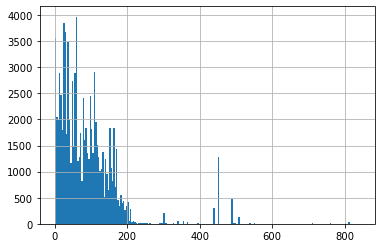

In [97]:
df_2019['FIPSCountyCode'].hist(bins=219)
plt.show()

Hence most of the counties between 0 and 200 have highest loan counts

## CensusTractMinorityRatioPercent: The percentage of the property's census tract population that is minority.

Check the minority ratio of the community. 

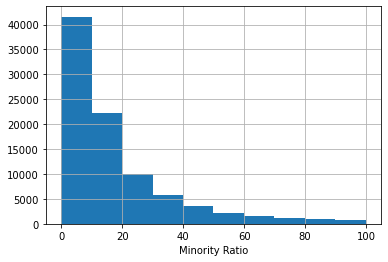

In [102]:
df_2019['CensusTractMinorityRatioPercent'].hist()
plt.xlabel('Minority Ratio')
plt.show()

Hence most of the mortages have low Minority ratio. 

## CensusTractMedFamIncomeAmount : The property's census tract median family income

Let check median income based on census.

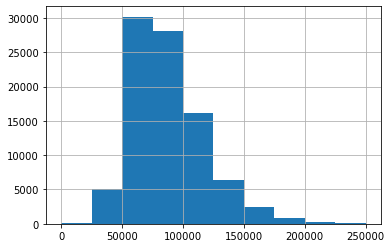

In [109]:
df_2019['CensusTractMedFamIncomeAmount'].hist(bins=10)
plt.show()

In [105]:
#Stattiscs of the median income
df_2019['CensusTractMedFamIncomeAmount'].describe()

count     89767.000000
mean      87799.607785
std       30551.702748
min           0.000000
25%       66270.000000
50%       82019.000000
75%      104219.000000
max      250001.000000
Name: CensusTractMedFamIncomeAmount, dtype: float64

## LocalAreaMedianIncomeAmount : The property's median income for the area based on the most recent decennial census.

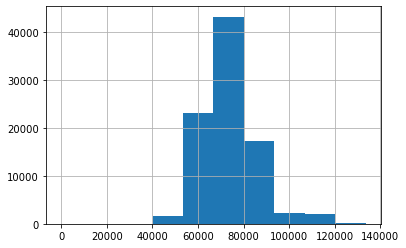

In [108]:
df_2019['LocalAreaMedianIncomeAmount'].hist(bins=10)
plt.show()

In [110]:
df_2019['LocalAreaMedianIncomeAmount'].describe()

count     89767.000000
mean      74078.453998
std       11949.849407
min           0.000000
25%       65829.000000
50%       73493.000000
75%       79347.000000
max      133523.000000
Name: LocalAreaMedianIncomeAmount, dtype: float64

Hence local area median income seems to be less than countrywise median income

## TotalMonthlyIncomeAmount: The total monthly qualifying income used for underwriting in whole dollars for all borrowers on the loan.

Lets plot the histogram and statiscs to check the overall income used to underwrite loans. 

In [120]:
#lets convert monthly income to annual inocme
df_2019['TotalAnnualIncomeAmount']=df_2019['TotalMonthlyIncomeAmount']*12

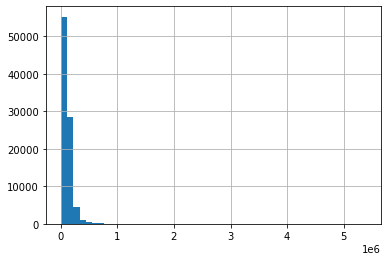

In [122]:
df_2019['TotalAnnualIncomeAmount'].hist(bins=50)
plt.show()

In [123]:
df_2019['TotalAnnualIncomeAmount'].describe()

count    8.976700e+04
mean     1.180511e+05
std      9.412163e+04
min      9.492000e+03
25%      6.738000e+04
50%      9.999600e+04
75%      1.428840e+05
max      5.388012e+06
Name: TotalAnnualIncomeAmount, dtype: float64

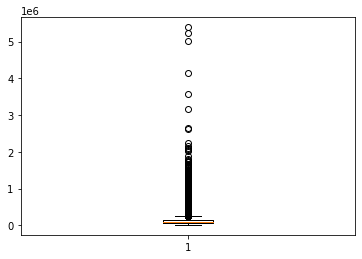

In [128]:
#lets plot boxplot to see if there is any otliers. 
plt.boxplot(df_2019['TotalAnnualIncomeAmount'])
plt.show()

In [131]:
#Check Annual salaraies greater than 75 percentile. 
np.sum(df_2019['TotalAnnualIncomeAmount']>1.428840e+05)

22438

Hence it seems that most of the loans have been sanctioned to high income families. 

## HUDMedianIncomeAmount: Current median income for a family of four for the area as established by HUD

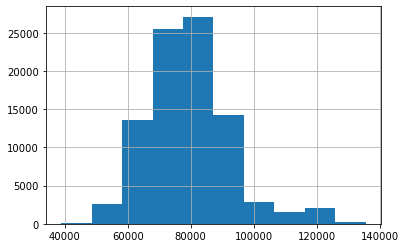

In [134]:
df_2019['HUDMedianIncomeAmount'].hist(bins=10)
plt.show()

In [136]:
#Statiscs
df_2019['HUDMedianIncomeAmount'].describe()

count     89767.000000
mean      79036.440362
std       13119.438254
min       38900.000000
25%       69700.000000
50%       78000.000000
75%       86100.000000
max      135500.000000
Name: HUDMedianIncomeAmount, dtype: float64

HUD median income is approx have same pattern as local area income. 

## LoanAcquisitionActualUPBAmt: The Amount of unpaid principal balance in whole dollars when acquired by the FHLBank.